In [8]:
from pymongo import MongoClient
from bson import ObjectId
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# MongoDB setup
client = MongoClient("mongodb://localhost:27017")
db = client["lifesnaps"]
collection = db["fitbit"]


In [9]:
user_id = ObjectId("621e2f9167b776a240011ccb")

query = {
    "id": user_id,
    "type": "Daily Heart Rate Variability Summary"
}

In [ ]:
cursor = collection.find(query).sort("data.timestamp", 1)

# Prepare lists to hold date and HRV values
dates = []
hrv_values = []

# Iterate through all documents and print each one
for i, doc in enumerate(cursor, 1):
    hrv = doc.get("data", {}).get("rmssd")
    timestamp = doc.get("data", {}).get("timestamp")

    # Convert timestamp string to datetime if needed
    if isinstance(timestamp, str):
        timestamp = datetime.fromisoformat(timestamp)

    if hrv is not None and timestamp is not None:
        dates.append(timestamp)
        hrv_values.append(hrv)
        print(f"Row {i}: Date = {timestamp}, HRV (RMSSD) = {hrv}")


Row 1: Date = 2021-10-24 00:00:00, HRV (RMSSD) = 28.4
Row 2: Date = 2021-10-25 00:00:00, HRV (RMSSD) = 23.568
Row 3: Date = 2021-10-26 00:00:00, HRV (RMSSD) = 17.974
Row 4: Date = 2021-10-27 00:00:00, HRV (RMSSD) = 19.41
Row 5: Date = 2021-10-28 00:00:00, HRV (RMSSD) = 19.028


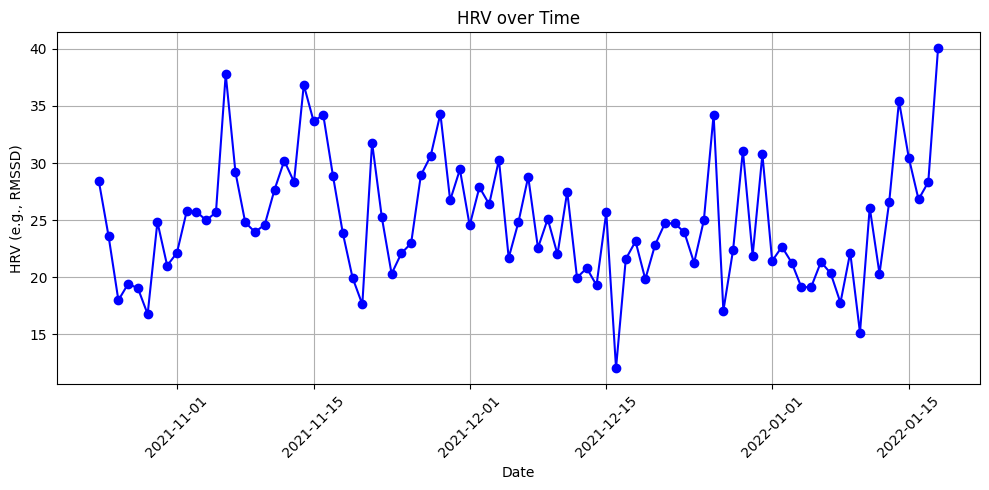

In [11]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(dates, hrv_values, marker='o', linestyle='-', color='blue')
plt.title("HRV over Time")
plt.xlabel("Date")
plt.ylabel("HRV (e.g., RMSSD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
